In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

# Zarah Sultana activity

In [2]:
path_data = "../data/"
name = "MP_activity_timeseries_lbl"

t1 = pd.read_csv(path_data+name+"1.csv")
t3 = pd.read_csv(path_data+name+"3.csv")
t5 = pd.read_csv(path_data+name+"5.csv")
t6 = pd.read_csv(path_data+name+"6.csv")

In [3]:
df1 = t1.loc[t1.Screen_name=='zarahsultana']
df3 = t3.loc[t1.Screen_name=='zarahsultana']
df5 = t5.loc[t1.Screen_name=='zarahsultana']
df6 = t6.loc[t1.Screen_name=='zarahsultana']

In [4]:
df = pd.concat([df1, df3, df5, df6])
df = df[df.columns[1:]]
df.index = [1, 3, 5, 6]

In [6]:
period = 7
start = 0

weeks = pd.DataFrame(index=[1, 3, 5, 6])
num_week = 1
while start+period < len(df.columns):
    cols = ["Day"+str(day) for day in np.arange(start, start+period)]

    weeks = weeks.join(df[cols].sum(axis=1).to_frame(f"Week{num_week}"))
    
    start = start + period
    num_week +=1
    
weeks = pd.concat([weeks,  weeks.sum(axis=0).to_frame("total").T])

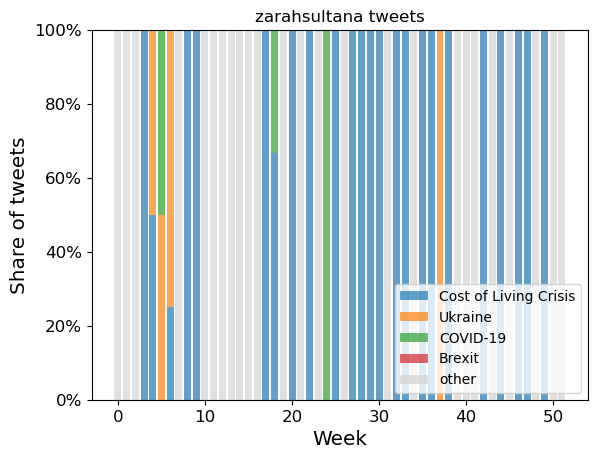

In [7]:
alpha=0.7

ts1 = (weeks.loc[1, :]/weeks.loc["total", :]).fillna(0).values
ts3 = (weeks.loc[3, :]/weeks.loc["total", :]).fillna(0).values
ts5 = (weeks.loc[5, :]/weeks.loc["total", :]).fillna(0).values
ts6 = (weeks.loc[6, :]/weeks.loc["total", :]).fillna(0).values

ts1 = 100*ts1
ts3 = 100*ts3
ts5 = 100*ts5
ts6 = 100*ts6

fig, ax = plt.subplots()

ax.bar(np.arange(0, len(ts5)), ts5, label='Cost of Living Crisis', alpha=alpha)
ax.bar(np.arange(0, len(ts5)), ts1, bottom=ts5, label='Ukraine', alpha=alpha)
ax.bar(np.arange(0, len(ts5)), ts3, bottom=ts5+ts1, label='COVID-19', alpha=alpha)
ax.bar(np.arange(0, len(ts5)), ts6, bottom=ts5+ts1+ts3, label='Brexit', alpha=alpha)

ax.bar(np.arange(0, len(ts5)), 100*np.ones(len(ts5))-ts1-ts3-ts5, 
       bottom=ts1+ts3+ts5+ts6, color='lightgrey', label='other', alpha=alpha)

plt.xlabel("Week", size='x-large')
plt.ylabel("Share of tweets", size='x-large')
plt.title("zarahsultana tweets")

plt.xticks(size='large')
plt.yticks(size='large')
plt.legend(loc=4)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.savefig("share_zarah.png", format="png", transparent=True, bbox_inches='tight')